In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cftime
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde
DPI = 100


In [2]:
filename = 'vix_mes_1990_2020.csv'
df = pd.read_csv(filename, sep=';', skiprows= 10,
                 header=0, index_col=0)#.dropna()
print(filename)

vix_mes_1990_2020.csv


In [3]:
df.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Ano')

In [ ]:
df.index = pd.to_datetime(df.index, errors='coerce')
df.index

In [ ]:
df

In [ ]:
# uma pequena lista de meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

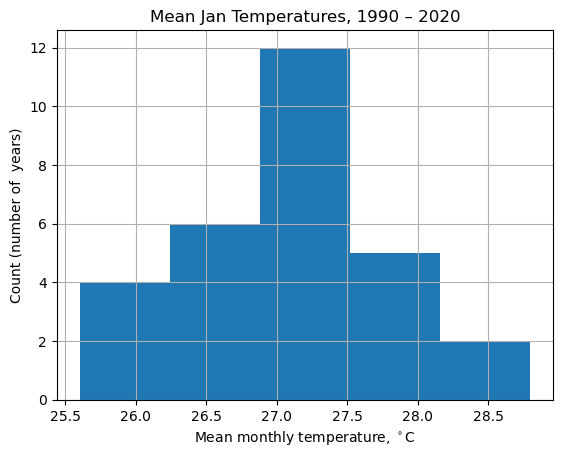

In [6]:
df['jan'].hist(bins=5)
plt.xlabel(r'Mean monthly temperature, $^\circ\mathrm{C}$')
plt.ylabel('Count (number of  years)')
plt.title('Mean Jan Temperatures, 1990 – 2020')
plt.show()

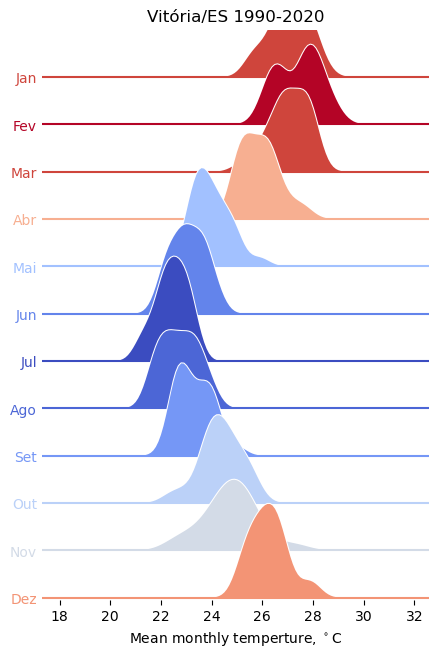

In [38]:
def plot_monthly_temperatures(filename, ax, title):
    """Make a ridgeline plot from the temperatures on Axes ax."""

    # Read the data into a pandas DataFrame.
    df = pd.read_csv(filename, sep=';', skiprows=10, header=0,
                     index_col=0).dropna()
    # The months are identified as the first 12 column names.
    months = df.columns[:12]
    # Get the mean temperatures across all years for each month.
    meanT = df[months].mean()
    # For a single plot, we might just take the min and max for that region.
    minT, maxT = np.min(meanT), np.max(meanT)
    # But to properly compare across regions, set these to their values across
    # both regions.
    #minT, maxT = 24.00, 29.00
    norm = Normalize(vmin=minT, vmax=maxT)

    # The temperature grid to plot the distributions on.
    T = np.arange(18, 32, 0.1)

    # A colormap: blue (cold) to red (warm).
    cmap = plt.get_cmap('coolwarm')

    # Offset each plot vertically by this amount. It looks nice if they overlap.
    offset = 0.25
    # The y-axis ticks are the month names.
    ax.yaxis.set_tick_params(length=0, width=0)
    ax.set_ylim(-0.01, 12*offset)
    ax.set_yticks(np.arange(0, 12*offset, offset))
    ax.set_yticklabels(months[::-1].str.title())
    yticklabels = ax.yaxis.get_ticklabels()

    for i, month in enumerate(months[::-1]):
        c = cmap(norm(meanT[month]))
        dist = gaussian_kde(df[month])
        # Plot the distribution in an white, which acts as an outline to the
        # filled region (in an appropriate colour) under each line.
        ax.plot(T, dist(T) + i * offset, c='w', zorder=15-i)
        ax.fill_between(T, dist(T) + i * offset, i * offset, fc=c, zorder=15-i) 
        # Complete with a base line across the width of the plot.
        ax.axhline(i * offset, c=c, zorder=15-i)
        # Also set the month name to the same colour as the plot.
        yticklabels[i].set_color(c)

    ax.set_xlabel(r'Mean monthly temperture, $^\circ\mathrm{C}$')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_title(title)

# Two plots, one above the other.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(500/DPI, 600/DPI), dpi=DPI)
filename = 'vix_mes_1990_2020.csv'
plot_monthly_temperatures(filename, axes, 'Vitória/ES 1990-2020')
plt.subplots_adjust(top=1, bottom=0.05, hspace=0.2)
#plt.savefig('temps-kde.png', dpi=DPI)
plt.show()